In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)




In [ ]:
mnist_train = pd.read_csv('mnist_train.csv')
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_train.shape

(60000, 785)

In [ ]:
# Splitting the features
X = mnist_train.drop(columns='label').values
y = mnist_train['label'].values

In [ ]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X.dtype

dtype('int64')

In [ ]:
print(y)

[5 0 4 ... 5 6 8]


In [ ]:
X = X /255.0

In [ ]:
  X.dtype

dtype('float64')

In [ ]:
X = X.reshape(-1,28,28,1)

In [ ]:
y = to_categorical(y,num_classes=10)

In [ ]:
# Splitting into training and testing

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [ ]:
print(X_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_train.ndim

4

In [ ]:
y_train.ndim

2

In [ ]:
X_test.ndim

4

In [ ]:
#CNN model building

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input


model = Sequential([
    Input(shape=(28, 28, 1)),
    # First Conv Block
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Conv Block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    layers.BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,098 (1.79 MB)

 Trainable params: 468,458 (1.79 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 219s 283ms/step - accuracy: 0.8678 - loss: 0.4297 - val_accuracy: 0.9854 - val_loss: 0.0471
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 289s 319ms/step - accuracy: 0.9774 - loss: 0.0751 - val_accuracy: 0.9883 - val_loss: 0.0375
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 259s 315ms/step - accuracy: 0.9832 - loss: 0.0542 - val_accuracy: 0.9802 - val_loss: 0.0670
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 227s 302ms/step - accuracy: 0.9855 - loss: 0.0488 - val_accuracy: 0.9912 - val_loss: 0.0282
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 253s 291ms/step - accuracy: 0.9889 - loss: 0.0373 - val_accuracy: 0.9912 - val_loss: 0.0294
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 282s 317ms/step - accuracy: 0.9887 - loss: 0.0348 - val_accuracy: 0.9905 - val_loss: 0.0330
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 270s 327ms/step - accuracy: 0.9895 - loss: 0.0316 - val_accuracy: 0.9918 - val_loss: 0.0287
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 257s 321ms/step - accuracy: 0.9909 -

In [ ]:
model.save("Handwritten_digit.keras")

In [ ]:
#Evaluating the model performance on mnist test dataset

In [ ]:
mnist_test = pd.read_csv('mnist_test.csv')
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_test.shape

(10000, 785)

In [ ]:
X_mnist_test= mnist_test.iloc[:,1:].values
y_mnist_test = mnist_test.iloc[:,0].values

In [ ]:
X_mnist_test = X_mnist_test/255.0
X_mnist_test = X_mnist_test.reshape(-1,28,28,1)

In [ ]:
X_mnist_test.shape

(10000, 28, 28, 1)

In [ ]:
y_mnist_test = to_categorical(y_mnist_test,num_classes = 10)

In [ ]:
y_mnist_test.shape

(10000, 10)

In [ ]:
test_loss, test_acc = model.evaluate(X_mnist_test, y_mnist_test, verbose=0)
print(f"MNIST Official Test Accuracy: {test_acc*100:.2f}%")


MNIST Official Test Accuracy: 99.30%


In [ ]:
#Checking on mnist test data

In [ ]:
img = X_mnist_test[12]
label = y_mnist_test[12]

pred = model.predict(img.reshape(1, 28, 28, 1))
predicted_class = np.argmax(pred)
print(f"True label: {np.argmax(label)} , predicted : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
True label: 9 , predicted : 9


In [ ]:
img = X_mnist_test[22]
label = y_mnist_test[22]

pred = model.predict(img.reshape(1, 28, 28, 1))
predicted_class = np.argmax(pred)
print(f"True label: {np.argmax(label)} , predicted : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
True label: 6 , predicted : 6


In [ ]:
print(model.input_shape)

(None, 28, 28, 1)


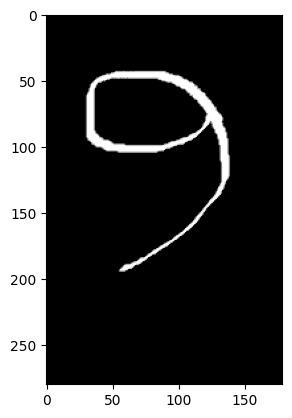

In [ ]:
import cv2
nine = cv2.imread("image_9.png")
plt.imshow(nine)

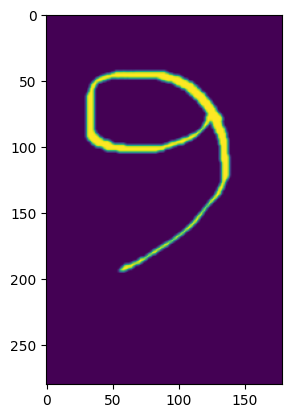

In [ ]:
gray = cv2.GaussianBlur(gray, (3, 3), 0)
plt.imshow(gray)


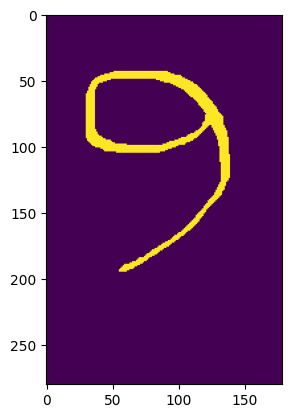

In [ ]:
if np.mean(gray) > 127:
    gray = cv2.bitwise_not(gray)

_, gray = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
plt.imshow(gray)

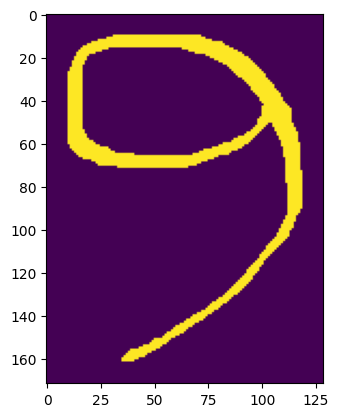

In [ ]:
# Find contours to locate the digit and add padding
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Add padding around the digit
    padding = 10
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(gray.shape[1] - x, w + 2 * padding)
    h = min(gray.shape[0] - y, h + 2 * padding)

    # Extract digit with padding
    digit = gray[y:y+h, x:x+w]
else:
    digit = gray
plt.imshow(digit)



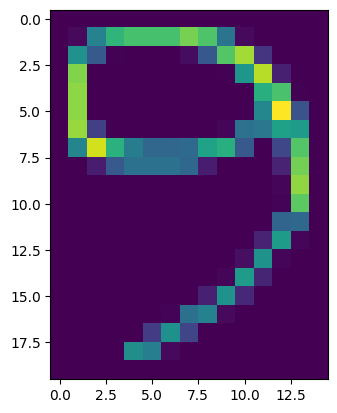

In [ ]:
# 5. Resize while keeping aspect ratio
height, width = digit.shape
if width > height:
    new_w = 20
    new_h = max(1, int(round(height * 20 / width)))
else:
    new_h = 20
    new_w = max(1, int(round(width * 20 / height)))

digit_resized = cv2.resize(digit, (new_w, new_h), interpolation=cv2.INTER_AREA)
plt.imshow(digit_resized)


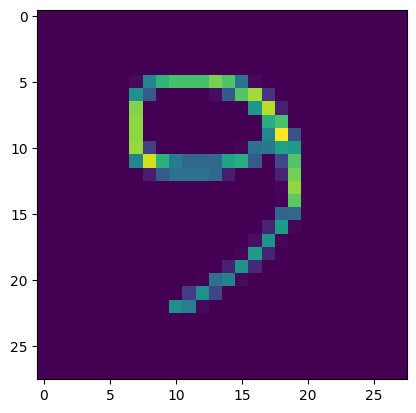

In [ ]:
 #6. Place on 28x28 canvas
resized9 = np.zeros((28, 28), dtype=np.uint8)
x_offset = (28 - new_w) // 2
y_offset = (28 - new_h) // 2
resized9[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = digit_resized
plt.imshow(resized9)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
 Predicted: 9


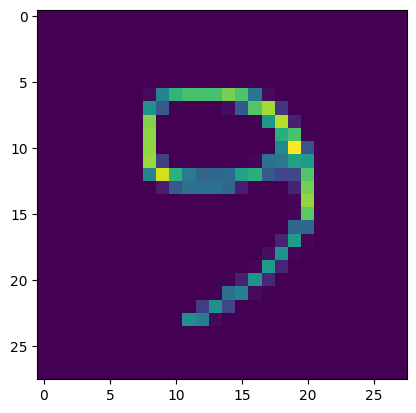

In [ ]:
 # Clean up with morphological operations
kernel = np.ones((2,2), np.uint8)
resized9 = cv2.morphologyEx(resized9, cv2.MORPH_CLOSE, kernel)

# Continue with your original normalization and prediction
resized_img9 = resized9.astype("float32") / 255.0
resized_img9 = resized_img9.reshape(1, 28, 28, 1)
plt.imshow(resized_img9[0])

pred = model.predict(resized_img9)
predicted_class = np.argmax(pred)
print(f" Predicted: {predicted_class}")

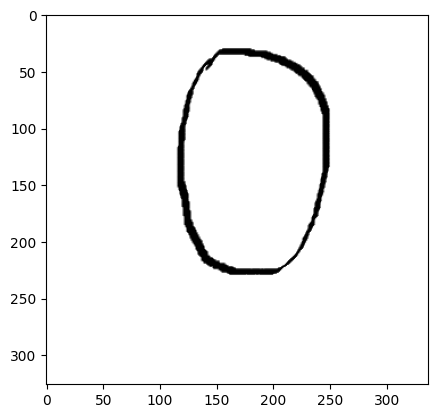

In [ ]:
import cv2
zero = cv2.imread("image_0.png")
plt.imshow(zero)

In [ ]:

gray = cv2.cvtColor(zero, cv2.COLOR_BGR2GRAY)




gray = cv2.GaussianBlur(gray, (3, 3), 0)


if np.mean(gray) > 127:
    gray = cv2.bitwise_not(gray)


_, gray = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:

    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)


    padding = 10
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(gray.shape[1] - x, w + 2 * padding)
    h = min(gray.shape[0] - y, h + 2 * padding)


    digit = gray[y:y+h, x:x+w]
else:
    digit = gray


height, width = digit.shape
if width > height:
    new_w = 20
    new_h = max(1, int(round(height * 20 / width)))
else:
    new_h = 20
    new_w = max(1, int(round(width * 20 / height)))

digit_resized = cv2.resize(digit, (new_w, new_h), interpolation=cv2.INTER_AREA)


resized0 = np.zeros((28, 28), dtype=np.uint8)
x_offset = (28 - new_w) // 2
y_offset = (28 - new_h) // 2
resized0[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = digit_resized


kernel = np.ones((2,2), np.uint8)
resized0 = cv2.morphologyEx(resized0, cv2.MORPH_CLOSE, kernel)


resized_img0 = resized0.astype("float32") / 255.0
resized_img0 = resized_img0.reshape(1, 28, 28, 1)

pred = model.predict(resized_img0)
predicted_class = np.argmax(pred)
confidence = np.max(pred) * 100

print(f"Predicted: {predicted_class}")
print(f"Status: {' CORRECT!' if predicted_class == 0 else ' wrong'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted: 0
Status:  CORRECT!


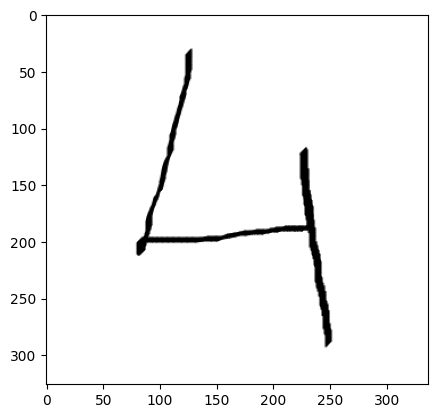

In [ ]:
import cv2
four = cv2.imread("four.png")
plt.imshow(four)

In [ ]:

gray = cv2.cvtColor(four, cv2.COLOR_BGR2GRAY)




gray = cv2.GaussianBlur(gray, (3, 3), 0)


if np.mean(gray) > 127:
    gray = cv2.bitwise_not(gray)


_, gray = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)


contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:

    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)


    padding = 10
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(gray.shape[1] - x, w + 2 * padding)
    h = min(gray.shape[0] - y, h + 2 * padding)


    digit = gray[y:y+h, x:x+w]
else:
    digit = gray


height, width = digit.shape
if width > height:
    new_w = 20
    new_h = max(1, int(round(height * 20 / width)))
else:
    new_h = 20
    new_w = max(1, int(round(width * 20 / height)))

digit_resized = cv2.resize(digit, (new_w, new_h), interpolation=cv2.INTER_AREA)


resized4 = np.zeros((28, 28), dtype=np.uint8)
x_offset = (28 - new_w) // 2
y_offset = (28 - new_h) // 2
resized4[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = digit_resized


kernel = np.ones((2,2), np.uint8)
resized4 = cv2.morphologyEx(resized4, cv2.MORPH_CLOSE, kernel)


resized_img4 = resized4.astype("float32") / 255.0
resized_img4 = resized_img4.reshape(1, 28, 28, 1)

pred = model.predict(resized_img4)
predicted_class = np.argmax(pred)
confidence = np.max(pred) * 100

print(f"Predicted: {predicted_class}")
print(f"Status: {' CORRECT!' if predicted_class == 4 else ' wrong'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted: 4
Status:  CORRECT!


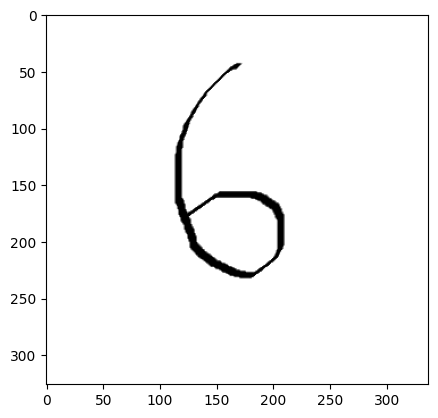

In [ ]:
import cv2
six = cv2.imread("six.png")
plt.imshow(six)

In [ ]:

gray = cv2.cvtColor(six, cv2.COLOR_BGR2GRAY)

gray = cv2.GaussianBlur(gray, (3, 3), 0)


if np.mean(gray) > 127:
    gray = cv2.bitwise_not(gray)


_, gray = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)


contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:

    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)


    padding = 10
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(gray.shape[1] - x, w + 2 * padding)
    h = min(gray.shape[0] - y, h + 2 * padding)


    digit = gray[y:y+h, x:x+w]
else:
    digit = gray


height, width = digit.shape
if width > height:
    new_w = 20
    new_h = max(1, int(round(height * 20 / width)))
else:
    new_h = 20
    new_w = max(1, int(round(width * 20 / height)))

digit_resized = cv2.resize(digit, (new_w, new_h), interpolation=cv2.INTER_AREA)


resized6 = np.zeros((28, 28), dtype=np.uint8)
x_offset = (28 - new_w) // 2
y_offset = (28 - new_h) // 2
resized6[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = digit_resized


kernel = np.ones((2,2), np.uint8)
resized6 = cv2.morphologyEx(resized6, cv2.MORPH_CLOSE, kernel)


resized_img6 = resized6.astype("float32") / 255.0
resized_img6 = resized_img6.reshape(1, 28, 28, 1)

pred = model.predict(resized_img6)
predicted_class = np.argmax(pred)
confidence = np.max(pred) * 100

print(f"Predicted: {predicted_class}")
print(f"Status: {' CORRECT!' if predicted_class == 6 else ' wrong'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted: 6
Status:  CORRECT!


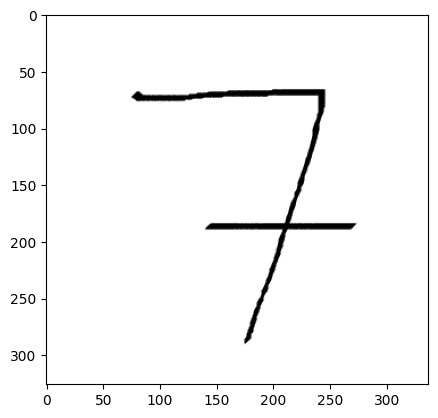

In [ ]:
import cv2
seven = cv2.imread("seven.png")
plt.imshow(seven)

In [ ]:

gray = cv2.cvtColor(seven, cv2.COLOR_BGR2GRAY)



gray = cv2.GaussianBlur(gray, (3, 3), 0)


if np.mean(gray) > 127:
    gray = cv2.bitwise_not(gray)


_, gray = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)


contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:

    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)


    padding = 10
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(gray.shape[1] - x, w + 2 * padding)
    h = min(gray.shape[0] - y, h + 2 * padding)


    digit = gray[y:y+h, x:x+w]
else:
    digit = gray

height, width = digit.shape
if width > height:
    new_w = 20
    new_h = max(1, int(round(height * 20 / width)))
else:
    new_h = 20
    new_w = max(1, int(round(width * 20 / height)))

digit_resized = cv2.resize(digit, (new_w, new_h), interpolation=cv2.INTER_AREA)


resized7 = np.zeros((28, 28), dtype=np.uint8)
x_offset = (28 - new_w) // 2
y_offset = (28 - new_h) // 2
resized7[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = digit_resized


kernel = np.ones((2,2), np.uint8)
resized7 = cv2.morphologyEx(resized7, cv2.MORPH_CLOSE, kernel)


resized_img7 = resized7.astype("float32") / 255.0
resized_img7 = resized_img7.reshape(1, 28, 28, 1)

pred = model.predict(resized_img7)
predicted_class = np.argmax(pred)
confidence = np.max(pred) * 100

print(f"Predicted: {predicted_class}")
print(f"Status: {' CORRECT!' if predicted_class == 7 else ' wrong'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted: 7
Status:  CORRECT!
